In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [79]:
data = pd.read_csv(r'C:\Users\Rakesh Penthala\Downloads\templates\dataset\survey.csv')

In [80]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [81]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [82]:
data.shape

(1259, 27)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

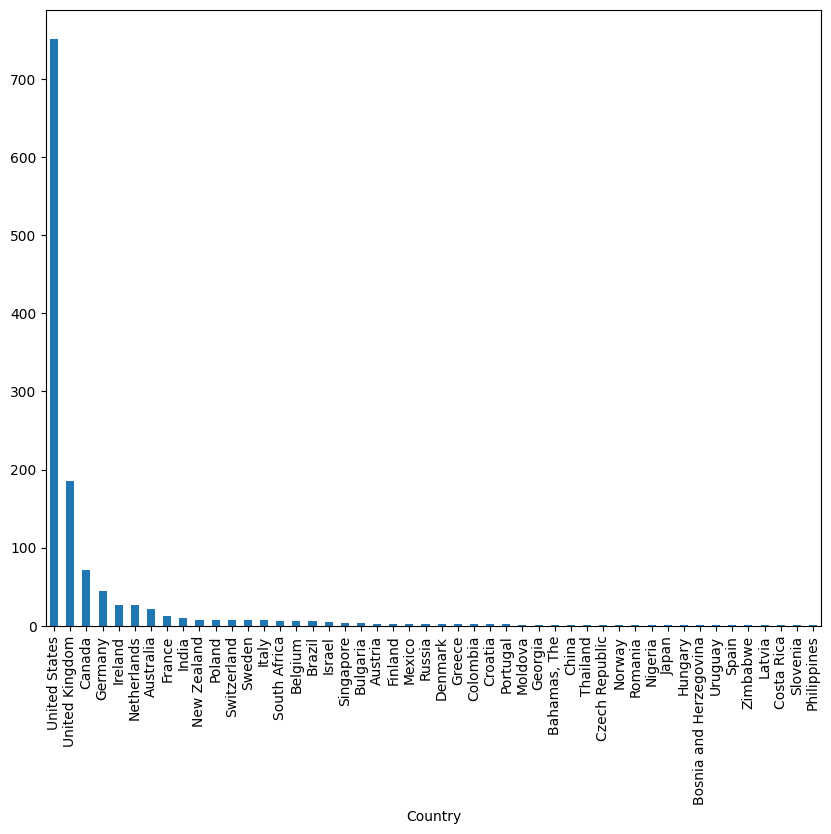

In [84]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [85]:
data.drop(['Country'], axis=1,inplace=True)
data.drop(['state','comments'],axis=1,inplace=True)
data.drop(['Timestamp'],axis=1,inplace=True)

In [86]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [87]:
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [88]:
data['self_employed'].fillna('No',inplace=True)

In [89]:
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [90]:
data['work_interfere'].fillna('N/A',inplace=True)

<Axes: xlabel='Age'>

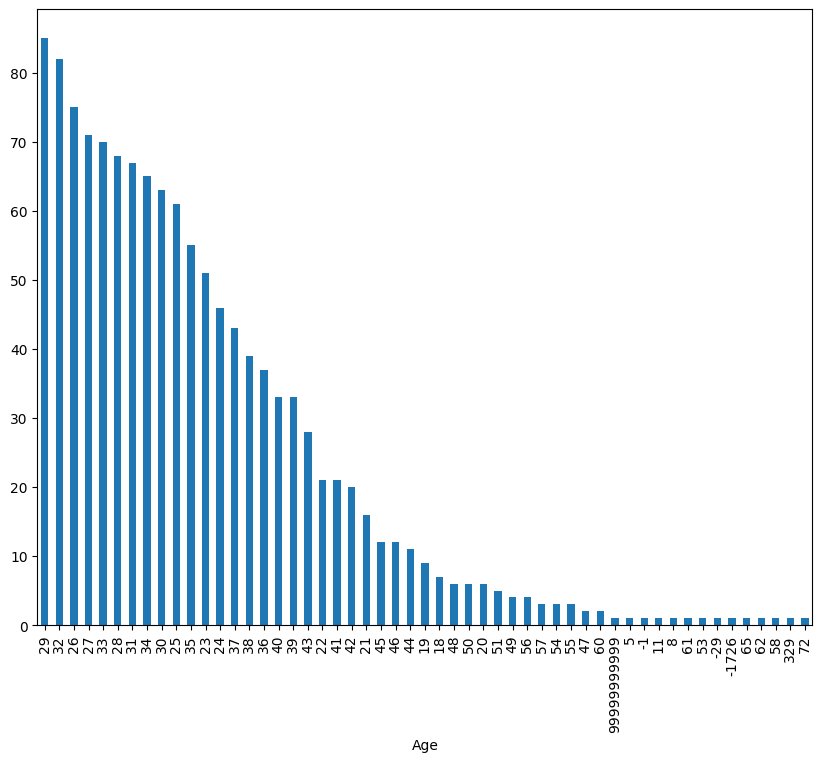

In [91]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [92]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<Axes: xlabel='Gender'>

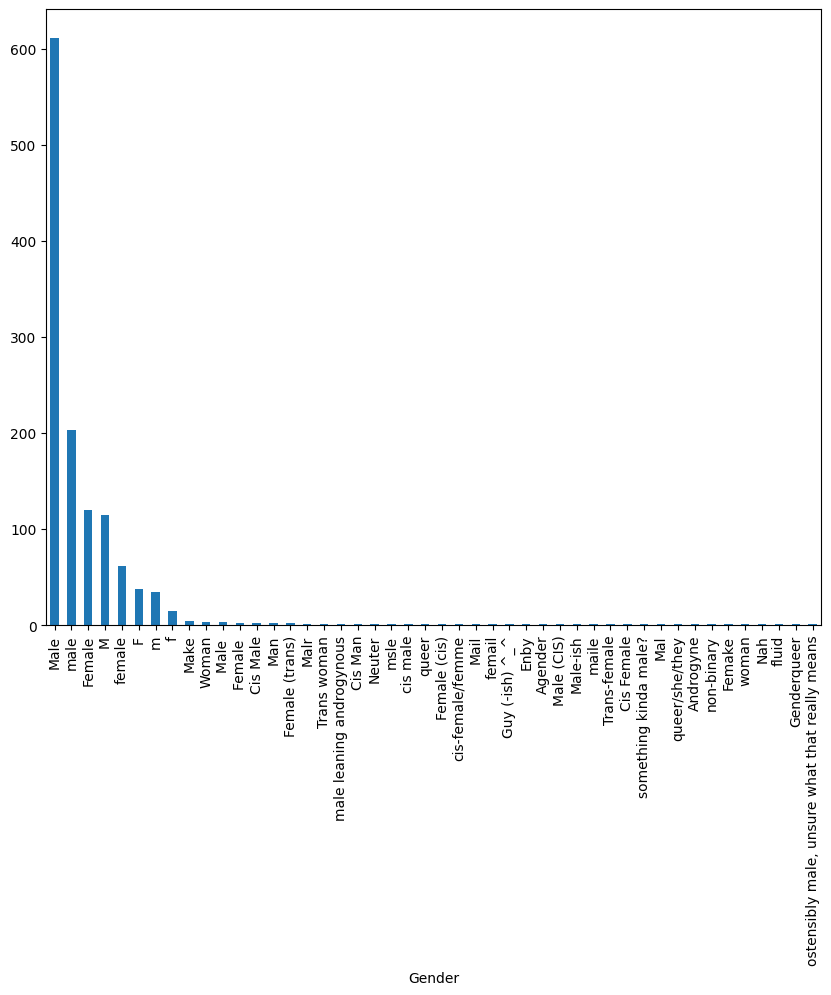

In [93]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [94]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                        'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                        'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

In [95]:
data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
'woman',],'Female', inplace = True)


In [96]:
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
'Agender', 'A little about you', 'Nah', 'All',
'ostensibly male, unsure what that really means',
'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

<Axes: xlabel='Gender'>

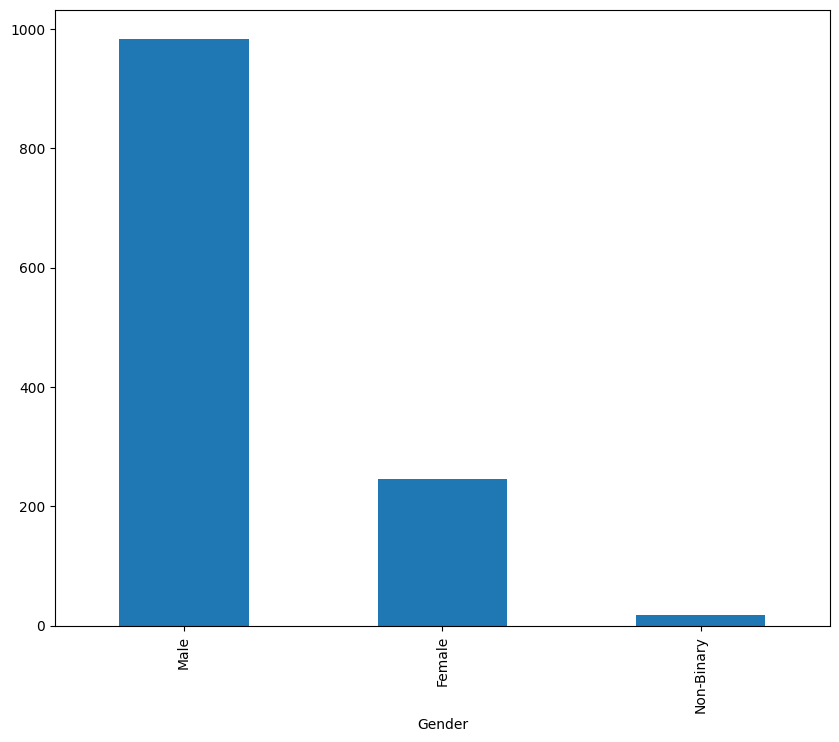

In [97]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

C:\Users\Rakesh Penthala\AppData\Local\Temp\ipykernel_14588\2113856535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

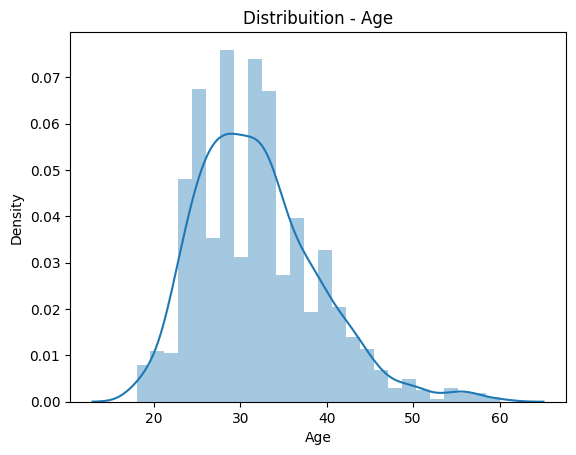

In [98]:
sb.distplot(data["Age"])
plt.title("Distribuition - Age")
plt.xlabel("Age")

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

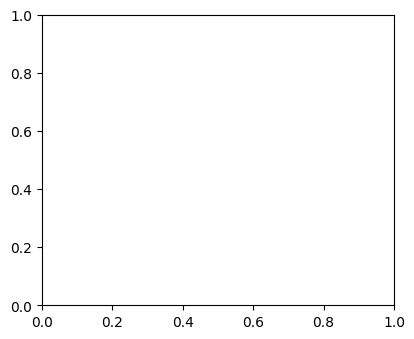

In [99]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'], x = data['treatment'])
plt.title('Employment Type')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

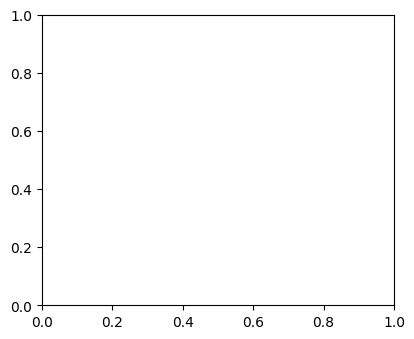

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data["family_history"], x = data['treatment'])
plt.title('Family History')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

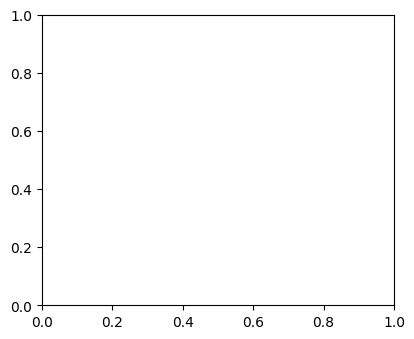

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data['work_interfere'], x = data['treatment'])
plt.title('Work Interference')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

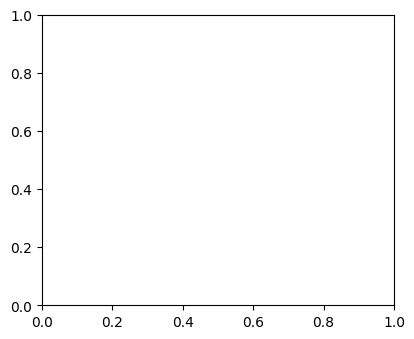

In [100]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data['remote_work'], x = data['treatment'])
plt.title('Work Type')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

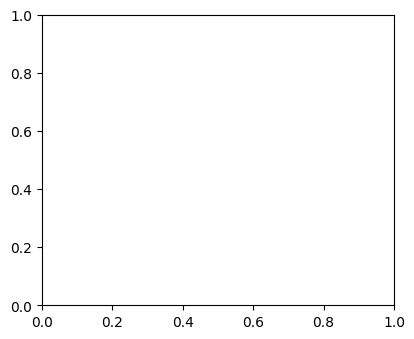

In [101]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data['tech_company'], x = data['treatment'])
plt.title('Company')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

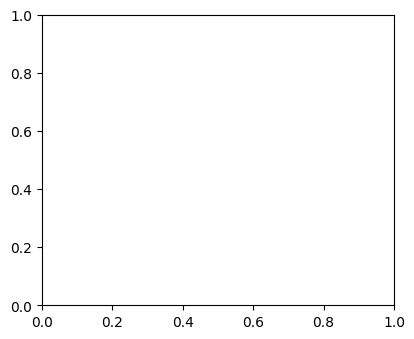

In [102]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data['benefits'], x = data['treatment'])
plt.title('Benefits')

Text(0.5, 1.0, 'Care Options')

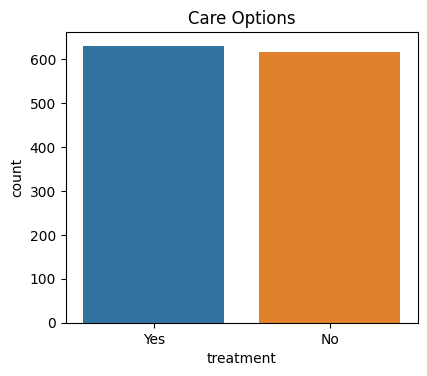

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data['care_options'], x = data['treatment'])
plt.title('Care Options')

Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

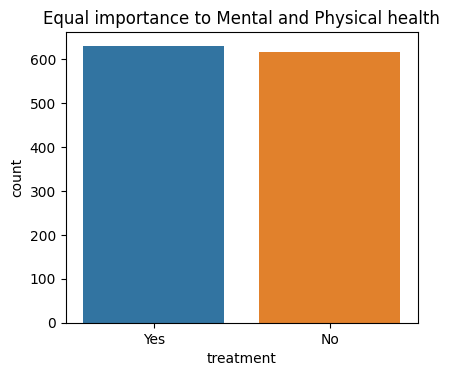

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data['mental_vs_physical'], x = data['treatment'])
plt.title('Equal importance to Mental and Physical health')

Text(0.5, 1.0, 'Wellness Program')

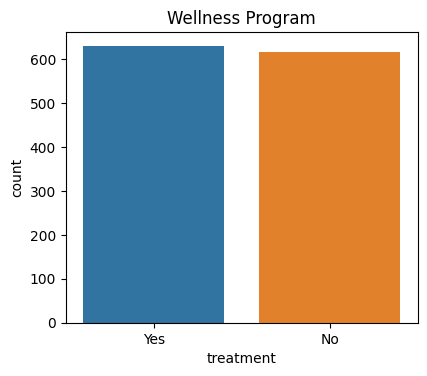

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data['wellness_program'], x = data['treatment'])
plt.title('Wellness Program')

Text(0.5, 1.0, 'Anonymity')

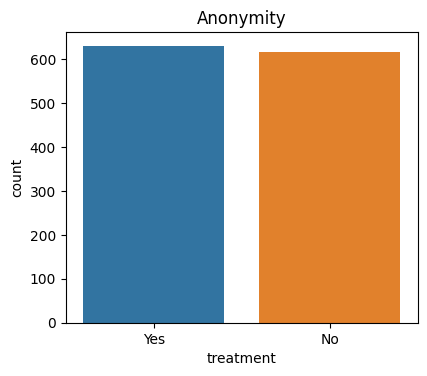

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data['anonymity'], x = data['treatment'])
plt.title('Anonymity')

Text(0.5, 1.0, 'Leave')

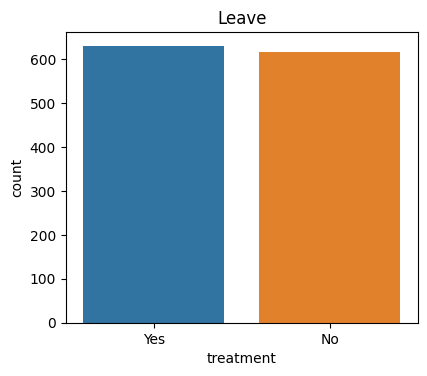

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(data['leave'], x = data['treatment'])
plt.title('Leave')

Text(0.5, 1.0, 'Mental Health Consequence')

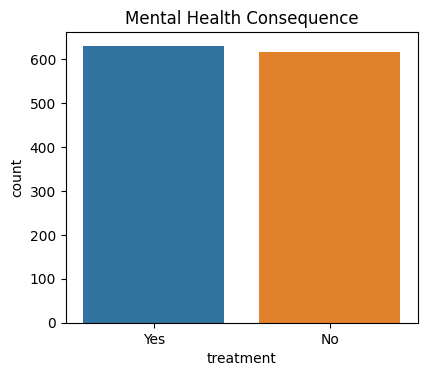

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data['mental_health_consequence'], x = data['treatment'])
plt.title('Mental Health Consequence')

Text(0.5, 1.0, 'Physical Health Consequence')

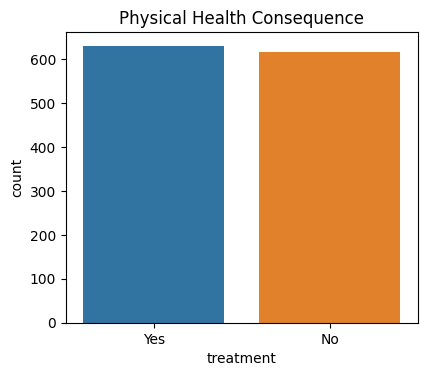

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data['phys_health_consequence'], x = data['treatment'])
plt.title('Physical Health Consequence')

Text(0.5, 1.0, 'Discussion with Coworkers')

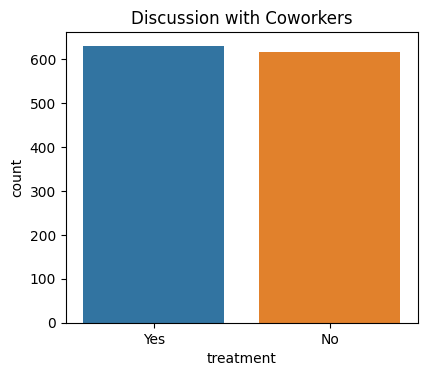

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data['coworkers'], x = data['treatment'])
plt.title('Discussion with Coworkers')

Text(0.5, 1.0, 'Disussion with Supervisor')

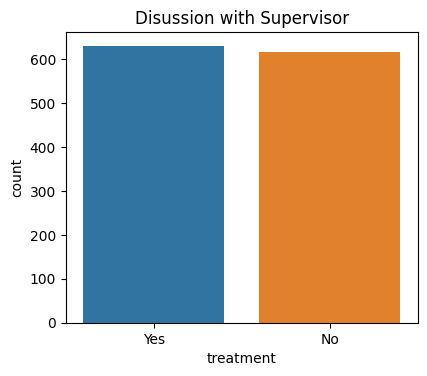

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data['supervisor'], x = data['treatment'])
plt.title('Disussion with Supervisor')

Text(0.5, 1.0, 'Discussion with Interviewer(Mental)')

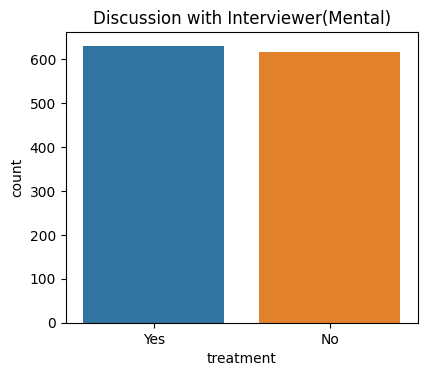

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data['mental_health_interview'], x = data['treatment'])
plt.title('Discussion with Interviewer(Mental)')

Text(0.5, 1.0, 'Discussion with Interviewer(Physical)')

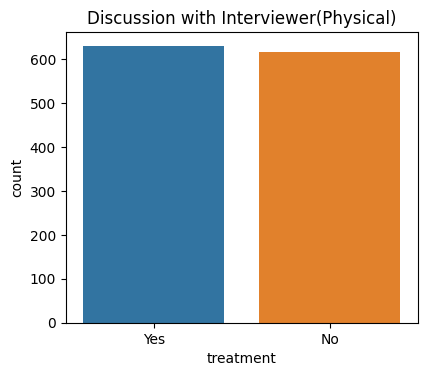

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data['phys_health_interview'], x = data['treatment'])
plt.title('Discussion with Interviewer(Physical)')

Text(0.5, 1.0, 'Consequence after Disclosure')

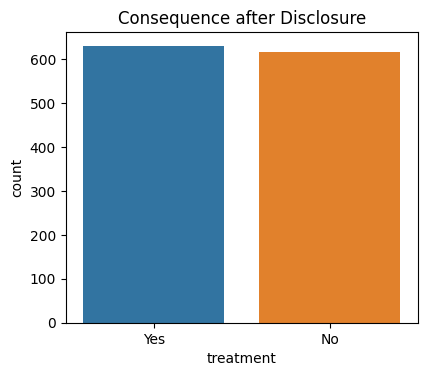

In [ ]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data['obs_consequence'], x = data['treatment'])
plt.title('Consequence after Disclosure')

In [103]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
x = data.drop('treatment', axis = 1)
y = data['treatment']

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [107]:
x = data.drop('treatment', axis = 1)
y = data['treatment']

In [114]:
ct = ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed', 'family_history',
      'work_interfere', 'no_employees', 'remote_work', 'tech_company',
      'benefits', 'care_options', 'wellness_program', 'seek_help',
      'anonymity', 'leave', 'mental_health_consequence',
      'phys_health_consequence', 'coworkers', 'supervisor',
      'mental_health_interview', 'phys_health_interview',
      'mental_vs_physical', 'obs_consequence'])],remainder='passthrough')

In [115]:
x = ct.fit_transform(x)

In [116]:
le = LabelEncoder()
y = le.fit_transform(y)

In [117]:
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=49)

In [119]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc
import sklearn.metrics as metrics

In [122]:
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)


In [123]:
def model_test(x_train, x_test, y_train, y_test,model,model_name):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print('====================================={}====================================='.format(model_name))
  print('score is : {}'.format(accuracy))

  print()

In [124]:
for model_name, model in model_dict.items():
  model_test(x_train, x_test,y_train, y_test, model, model_name)

=====================================Logistic regression=====================================
score is : 0.848

=====================================KNN Classifier=====================================
score is : 0.7813333333333333

=====================================Decision Tree Classifier=====================================
score is : 0.7946666666666666

=====================================Random Forest Classifier=====================================
score is : 0.8533333333333334

=====================================AdaBoost Classifier=====================================
score is : 0.864

=====================================Gradient Boosting Classifier=====================================
score is : 0.84

=====================================XGB Classifier=====================================
score is : 0.84



In [125]:
abc = AdaBoostClassifier(random_state = 99)
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)
print('Accuracy of AdaBoost=',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost= 0.864


In [126]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
              'learning_rate': [(0.97 + x / 100) for x in range(0,8)],
              }
abc_random = RandomizedSearchCV(random_state = 49,estimator = abc, param_distributions = params_abc, n_iter = 50, cv= 5,n_jobs = -1)


In [127]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [128]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [129]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [130]:
abc_tuned = AdaBoostClassifier(random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(x_train,y_train)
pred_abc_tuned = abc_tuned.predict(x_test)
print('Accuracy of AdaBoost(tuned)=',accuracy_score(y_test,pred_abc_tuned))

Accuracy of AdaBoost(tuned)= 0.8693333333333333


Text(50.722222222222214, 0.5, 'Actual')

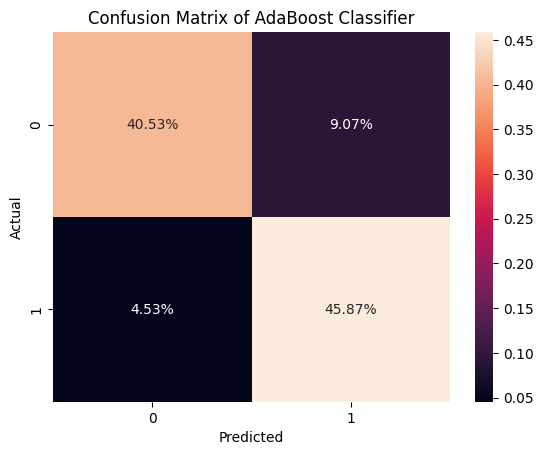

In [131]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

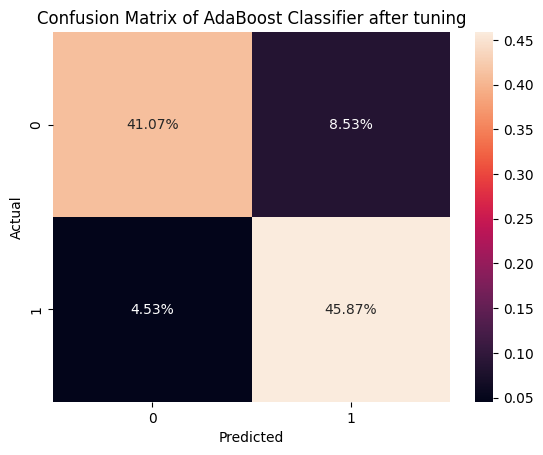

In [132]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

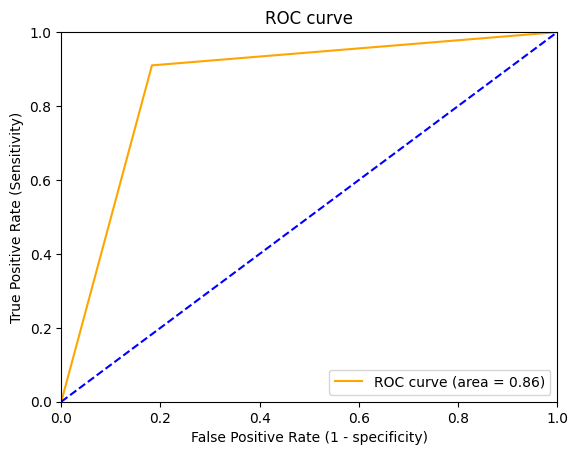

(array([0.       , 0.1827957, 1.       ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [133]:
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc =metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

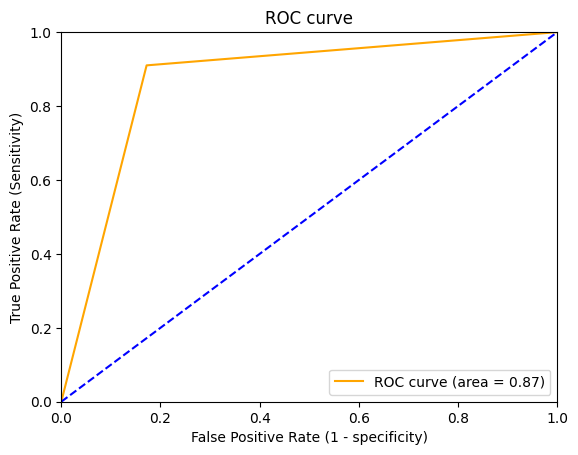

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([inf,  1.,  0.]))

In [134]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned =metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc_tuned)

In [135]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [136]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [137]:
import pickle
pickle.dump(abc_tuned,open('model.pkl','wb'))